### Business Case: Walmart - Confidence Interval and CLT

# Assumptions
 
    Randomization: The data must be sampled randomly such that every member in a population has an equal probability of being selected to be in the sample.
    
    Independence: The sample values must be independent of each other.
    
    The 10% Condition: When the sample is drawn without replacement, the sample size should be no larger than 10% of the population.
    
    Large Sample Condition: The sample size needs to be sufficiently large.

#### About Walmart
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide

#### Business Problem
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

#### Primary Objective
* Analyse the purchase behaviour of customerbase and finding out various other factors that impacts the purchase behaviour with a certain degree of confidence
* Analyse the spending habits accross various sections of userbase and how they differ between factors like gender, marital status, occupation, etc.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094'
df = pd.read_csv(url)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


#### Provided Dataset Information
* User_ID: User ID  
* Product_ID:	ID of Product Purchased  
* Gender:	Sex of User  
* Age: Age in bins  
* Occupation:	Occupation(Masked)  
* City_Category: Category of the City (A,B,C)  
* StayInCurrentCityYears:	Number of years stay in current city  
* Marital_Status:	Marital Status  
* ProductCategory: Product Category (Masked)  
* Purchase: Purchase Amount  

In [ ]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 550068 rows and 10 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


From above output we could infer:
* There are 5 catagorical data columns - Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years 
* There are 5 numerical data columns- User_ID, Occupation, Marital_Status, Product_Category, Purchase 

'User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status' are categorical variables. As a result, we need to change the datatype to category.

#### Change the data types of - Occupation, Marital_Status, Product_Category

In [ ]:
cols = ['User_ID','Product_ID','Gender', 'Age','City_Category','Marital_Status']
for col_name in cols:
    df[col_name] = df[col_name].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), int64(3), object(1)
memory usage: 21.3+ MB


In [ ]:
# checking null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no null Values in the dataset

In [ ]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.000000,550068,550068,550068.0,550068.000000,550068.000000
unique,5891.0,3631,2,7,NaN,3,5,2.0,NaN,NaN
top,1001680.0,P00265242,M,26-35,NaN,B,1,0.0,NaN,NaN
freq,1026.0,1880,414259,219587,NaN,231173,193821,324731.0,NaN,NaN
mean,NaN,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,5.404270,9263.968713
std,NaN,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,3.936211,5023.065394
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,12.000000
25%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,5823.000000
50%,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,5.000000,8047.000000
75%,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,8.000000,12054.000000


#### Descriptive Analysis of given data:
* There seems to be no missing values in data 
* There are 3631 unique products in the dataset and **P00265242** is the most popular product.
* Out of 550068 users, count of Male = 414259 and Female = 135809.
* **Age** - Most of the users belong to age group of 26-35
* **Occupation** - The mean occupation(masked) is around 8 
* **City_Category** - Most purchases are made from City Category **B**
* **Stay in Curren City Years** - Most purchases are made by people who have recently shifted  to new city or have been in current city for 1 years
* Standard Deviation of **Purchase** is quite high and its possible that there might be outliers in that column

#### missing Values

In [ ]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

md = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
md

Total records =  550068


,Total Missing,In Percent
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category,0,0.0
Purchase,0,0.0


Inference - No Missing Values

In [ ]:
print(f"There are total of {df['User_ID'].nunique()} unique users")
print(f"There are total of {df['Product_ID'].nunique()} unique Products")

There are total of 5891 unique users
There are total of 3631 unique Products


Inference - The total number of records exceeds five million but the UserIDs are only 5891, meaning customers have visited multiple times in order to buy products.

# A deep dive into User ID
    
    Based on 5891 user IDs, how many are married, male or female, or the age of the users.

In [ ]:
df.groupby(['Gender'])['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [ ]:
print("Females are ", 1666/5891)
print("Males are ", 4225/5891)

Females are  0.2828042777117637
Males are  0.7171957222882362


- The percentage of women customers is only 28%
- Around 72% of customers are male

In [ ]:
df.groupby(['Age'])['User_ID'].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

In [ ]:
df.groupby(['City_Category'])['User_ID'].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

In [ ]:
df.groupby(['Stay_In_Current_City_Years'])['User_ID'].nunique()

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

In [ ]:
df.groupby(['Marital_Status'])['User_ID'].nunique()

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

# Basic Statistics Analysis - count, min, max, and mean

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Product_Category,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
df.describe(include=['object','category']).T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731


In [ ]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [ ]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
df.groupby(['City_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


In [ ]:
df.groupby(['City_Category'])['User_ID'].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

# Inferences
    
- There are more single people than married people.    
- Most mall customers are between the ages of 26 and 35.    
- The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.    
- Male customers tend to spend more than female customers, as the mean is higher for male customers.    
- The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.

In [ ]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

#### Observations
* ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
* 75% of the users are Male and 25% are Female
* 60% Single, 40% Married
* 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
* Total of 20 product categories are there
* There are 20 differnent types of occupations in the city

# Correlation Analysis

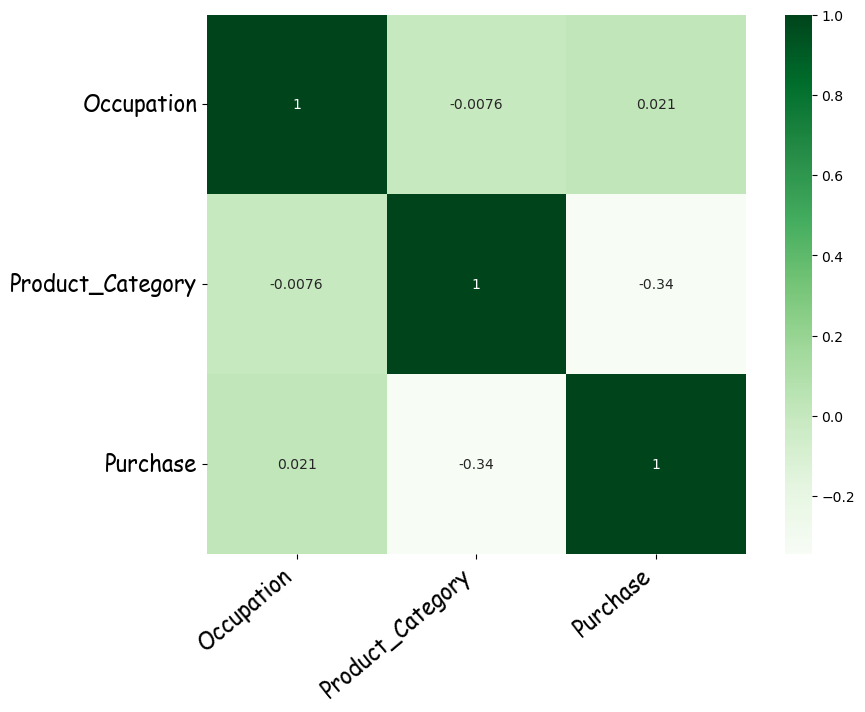

In [ ]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(df.corr(),
            annot=True,cmap='Greens',square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')
    
plt.show()

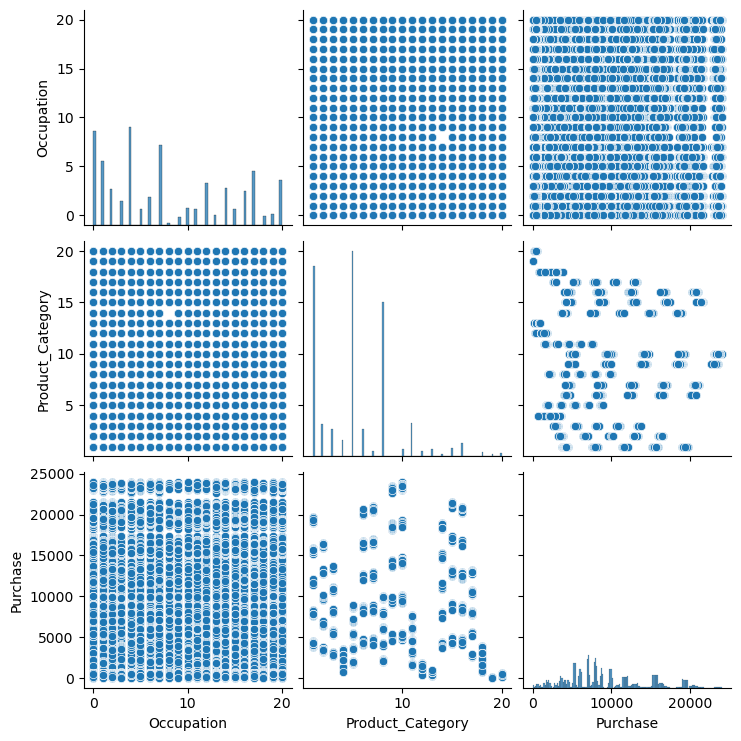

In [ ]:
sns.pairplot(df)

# Inference
- Mostly features are categorical and not much correlation can be observed from above graphs.

### Univariate Analysis
Understanding the distribution of data and detecting outlies for continuous variables

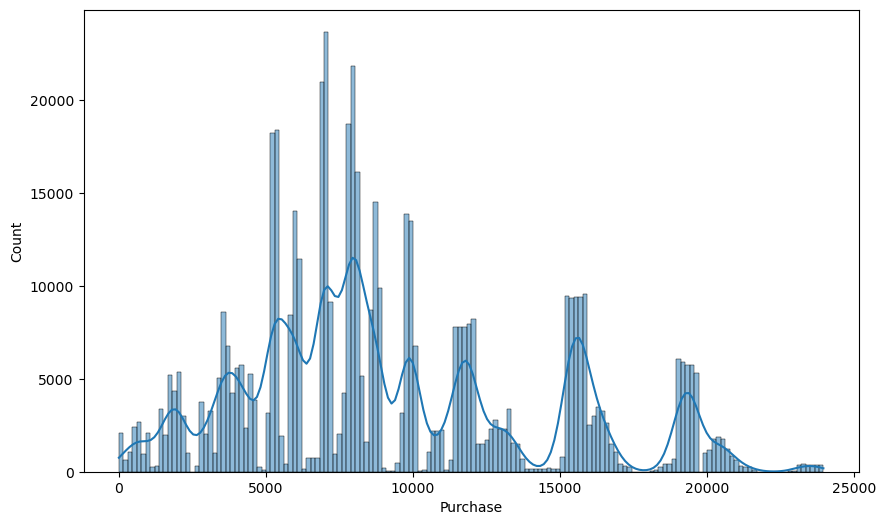

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

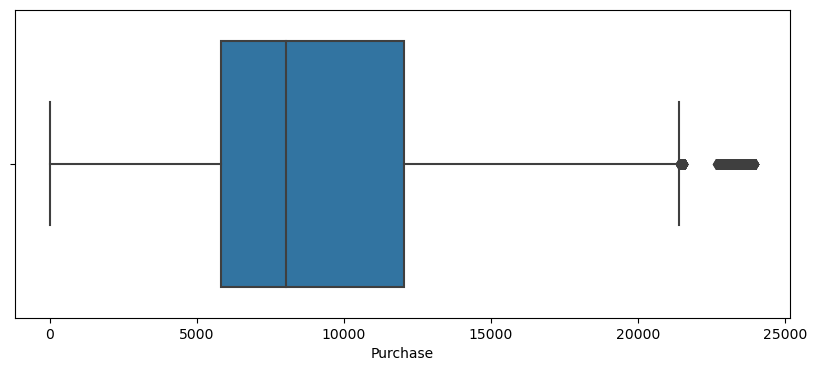

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

## Observation
- Purchase is having outliers

# Handling outliers

In [ ]:
df_v1 = df.copy()

In [ ]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = df_v1['Purchase'].quantile(0.75)
Q1 = df_v1['Purchase'].quantile(0.25)
IQR = Q3-Q1
df_v1 = df_v1[(df_v1['Purchase'] > Q1 - 1.5*IQR) & (df_v1['Purchase'] < Q3 + 1.5*IQR)]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


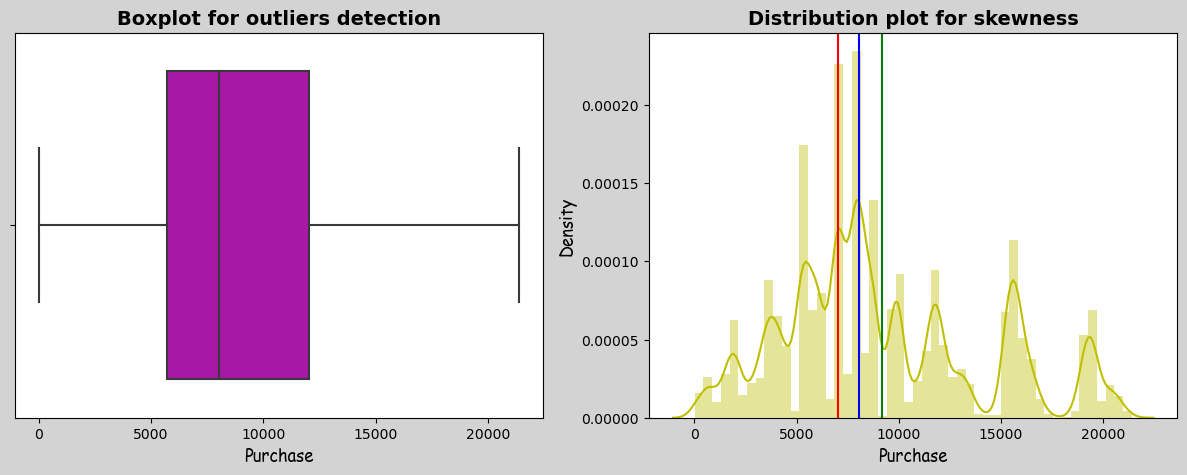

In [ ]:
# Visualizing our dependent variable for Outliers and Skewness
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")

plt.subplot(1,2,1)
sns.boxplot(df_v1["Purchase"],color='m')
plt.title("Boxplot for outliers detection", fontweight="bold",fontsize=14)
plt.xlabel('Purchase', fontsize=12,family = "Comic Sans MS")

plt.subplot(1,2,2)
sns.distplot(df_v1["Purchase"],color='y')

plt.title("Distribution plot for skewness", fontweight="bold",fontsize=14)
plt.ylabel('Density', fontsize=12,family = "Comic Sans MS")
plt.xlabel('Purchase', fontsize=12,family = "Comic Sans MS")
plt.axvline(df_v1["Purchase"].mean(),color="g")
plt.axvline(df_v1["Purchase"].median(),color="b")
plt.axvline(df_v1["Purchase"].mode()[0],color="r")

plt.show()

# Categorical variable Uni-variante Analysis

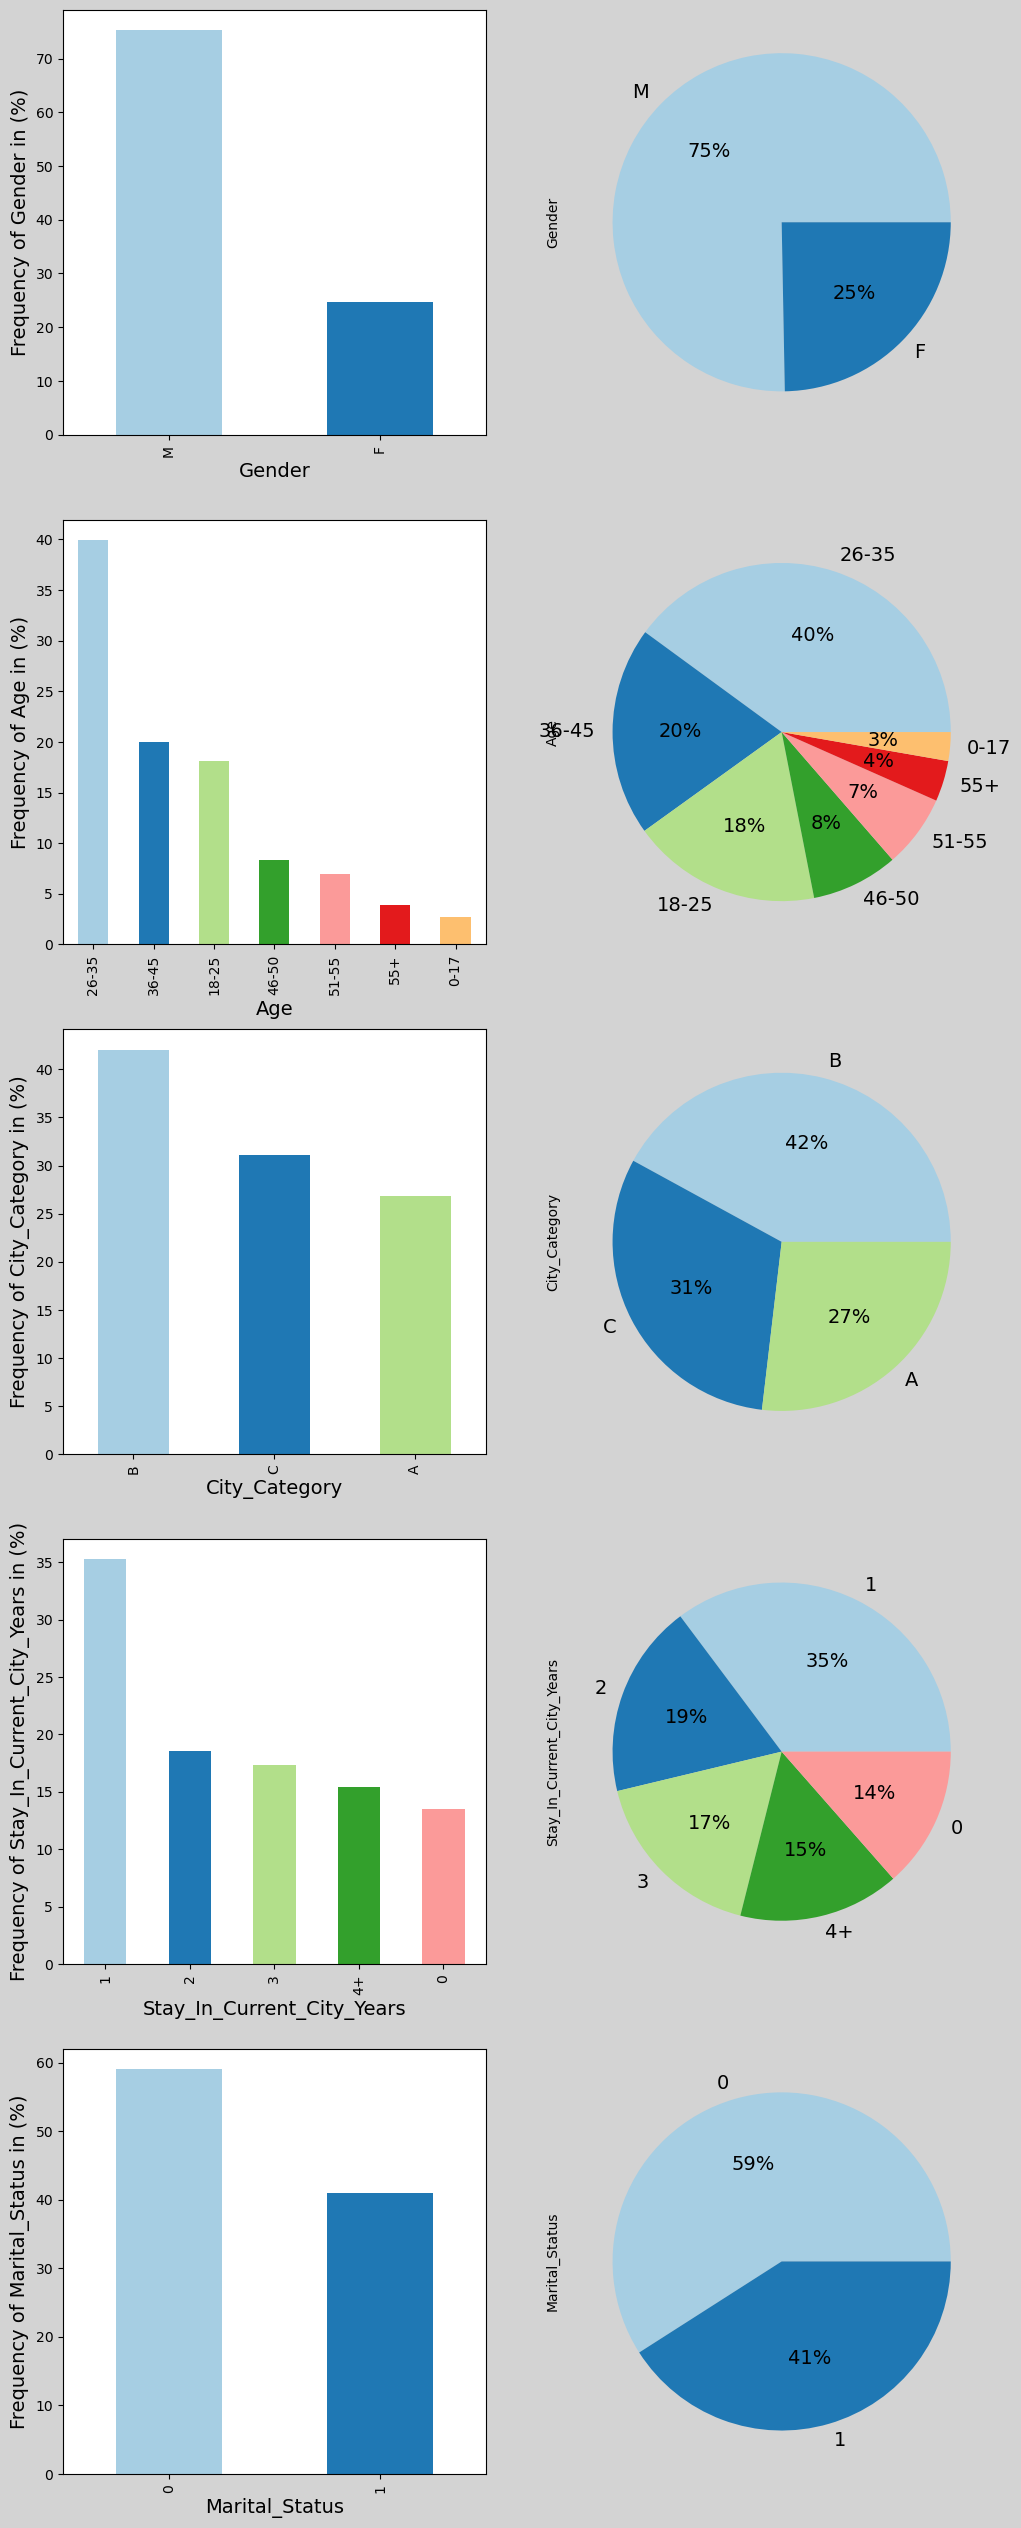

In [ ]:
def cat_analysis(df, colnames, nrows=2,mcols=2,width=20,height=30, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))  
    fig.set_facecolor(color = 'lightgrey')
    string = "Frequency of "
    rows = 0                          
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("Paired"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string, fontsize=14)
        ax[rows][0].set_xlabel(colname, fontsize=14)      
        count.plot.pie(colors = sns.color_palette("Paired"),autopct='%0.0f%%',
                       textprops={'fontsize': 14},ax=ax[rows][1])        
        string = "Frequency of "
        rows += 1
cat_colnames = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']
cat_analysis(df_v1,cat_colnames,5,2,12,32)

# Inferences
    Males clearly purchase more than females. 75% of men and only 25% of women purchase products.
    
    60% of purchases are made by people between the ages of 26 and 45
    
    City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.

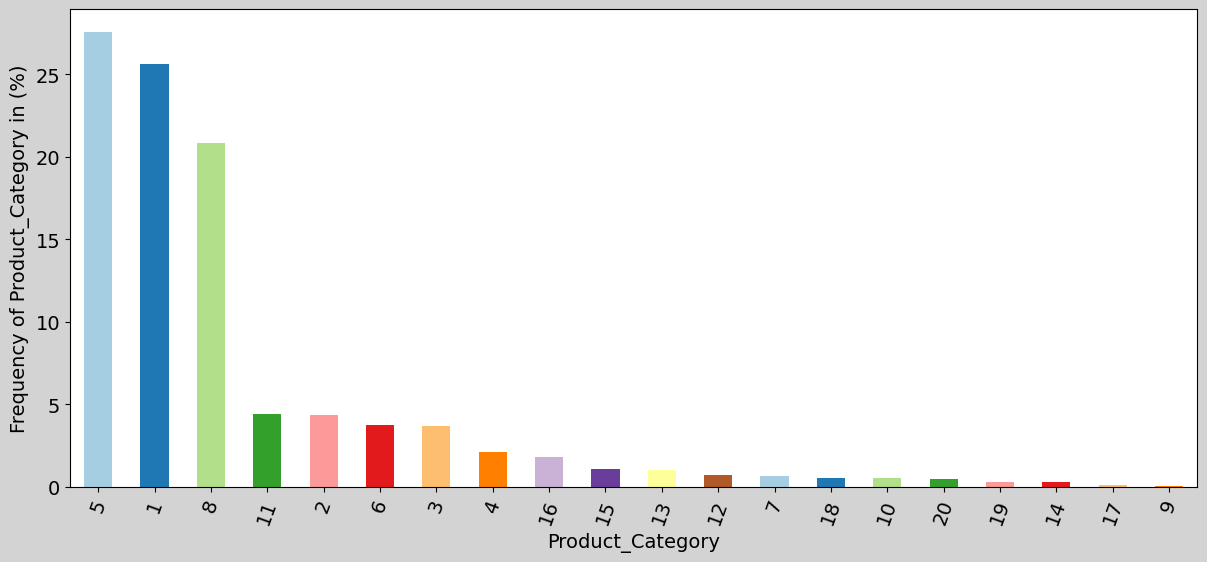

In [ ]:
# Frequency of each feature in percentage.
def bar_plot_percentage(df, colnames, sortbyindex=False):
    fig = plt.figure(figsize=(32, 36))
    fig.set_facecolor("lightgrey")
    string = "Frequency of "
    for colname in colnames:
        plt.subplot(5,2,colnames.index(colname)+1)
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette('Paired'))
        plt.xticks(rotation = 70,fontsize=14)
        plt.yticks(fontsize=14)
        plt.ylabel(string, fontsize=14)
        plt.xlabel(colname, fontsize=14)
        string = "Frequency of "
bar_plot_percentage(df_v1,['Product_Category'])

# Inference
    Product Category 5,1 & 8 are the products that customers buy the most.

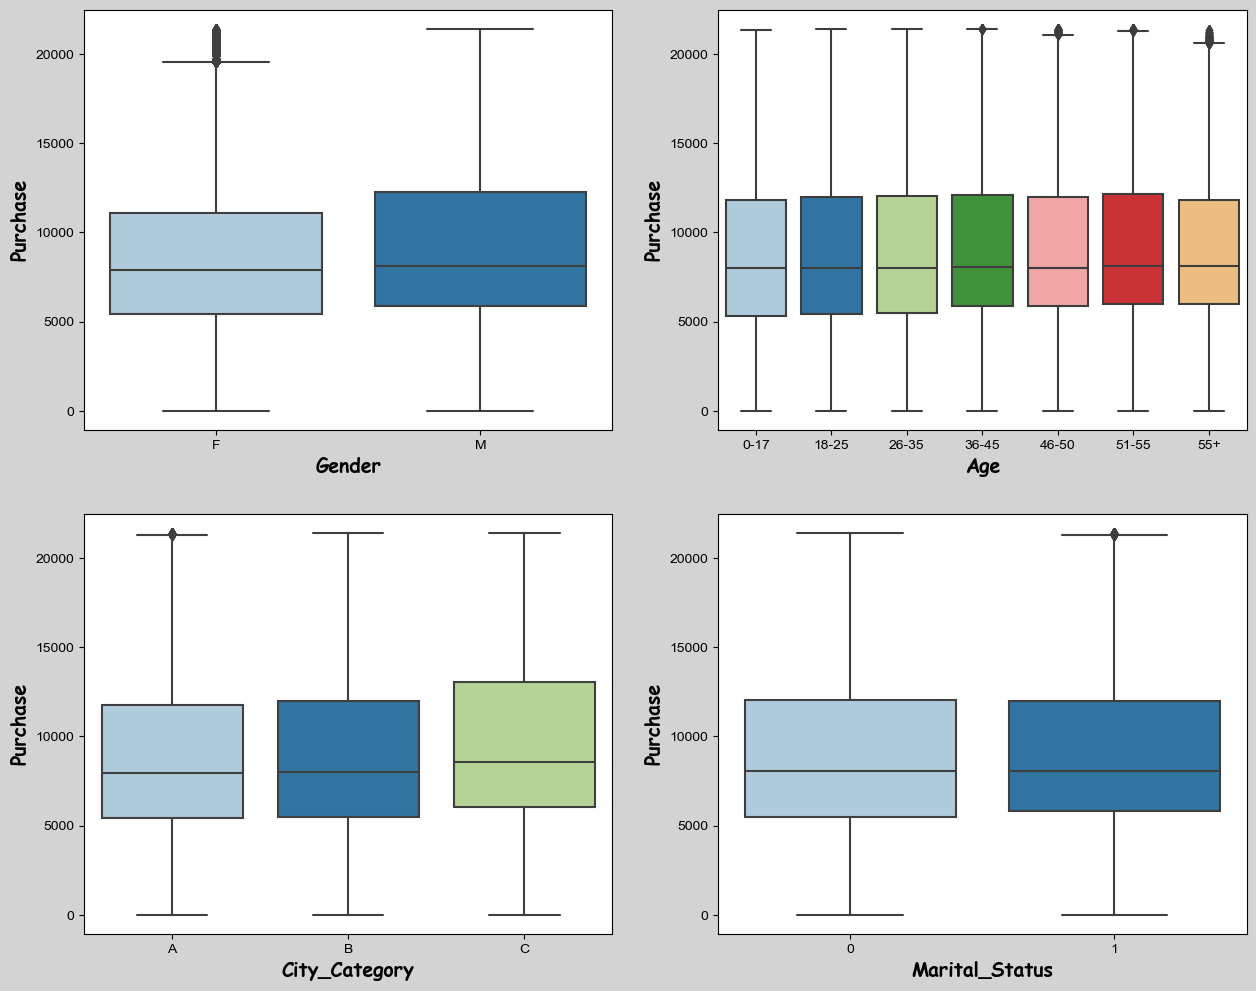

In [ ]:
def num_cat_bi(df,col_cat,col_num,nrows=1,mcols=2,width=15,height=6):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height),squeeze=False)
    sns.set(style='white')
    fig.set_facecolor("lightgrey")
    rows = 0
    i = 0
    while rows < nrows:
        sns.boxplot(x = col_cat[i],y = col_num, data = df,ax=ax[rows][0],palette="Paired")
        ax[rows][0].set_xlabel(col_cat[i], fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_ylabel(col_num,fontweight="bold", fontsize=14,family = "Comic Sans MS")
        i += 1
        sns.boxplot(x = col_cat[i],y = col_num, data = df,ax=ax[rows][1],palette="Paired")
        ax[rows][1].set_xlabel(col_cat[i], fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_ylabel(col_num,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        i += 1
        rows += 1
    plt.show()
col_cat = ['Gender', 'Age','City_Category','Marital_Status']
num_cat_bi(df_v1,col_cat,'Purchase',2,2,15,12)

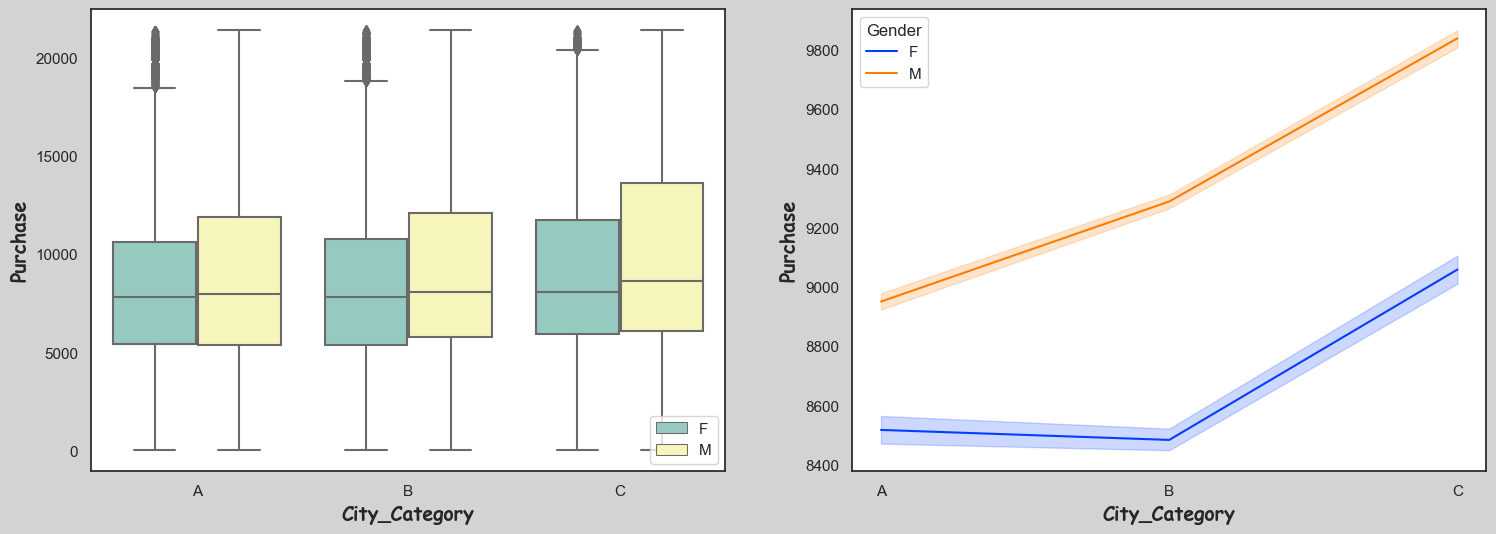

In [ ]:
def num_cat_bi_grpby(df,colname,category,groupby,nrows=1,mcols=2,width=18,height=6):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height),squeeze=False)
    sns.set(style='white')
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:
        sns.boxplot(x = category,y = var,hue=groupby, data = df,ax=ax[rows][0],palette="Set3")
        sns.lineplot(x=df[category],y=df[var],ax=ax[rows][1],hue=df[groupby],palette="bright") 
        ax[rows][0].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS")
        ax[rows][0].legend(loc='lower right')
        ax[rows][1].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
    plt.show()
col_num = [ 'Purchase']
num_cat_bi_grpby(df_v1,col_num,"City_Category",'Gender')

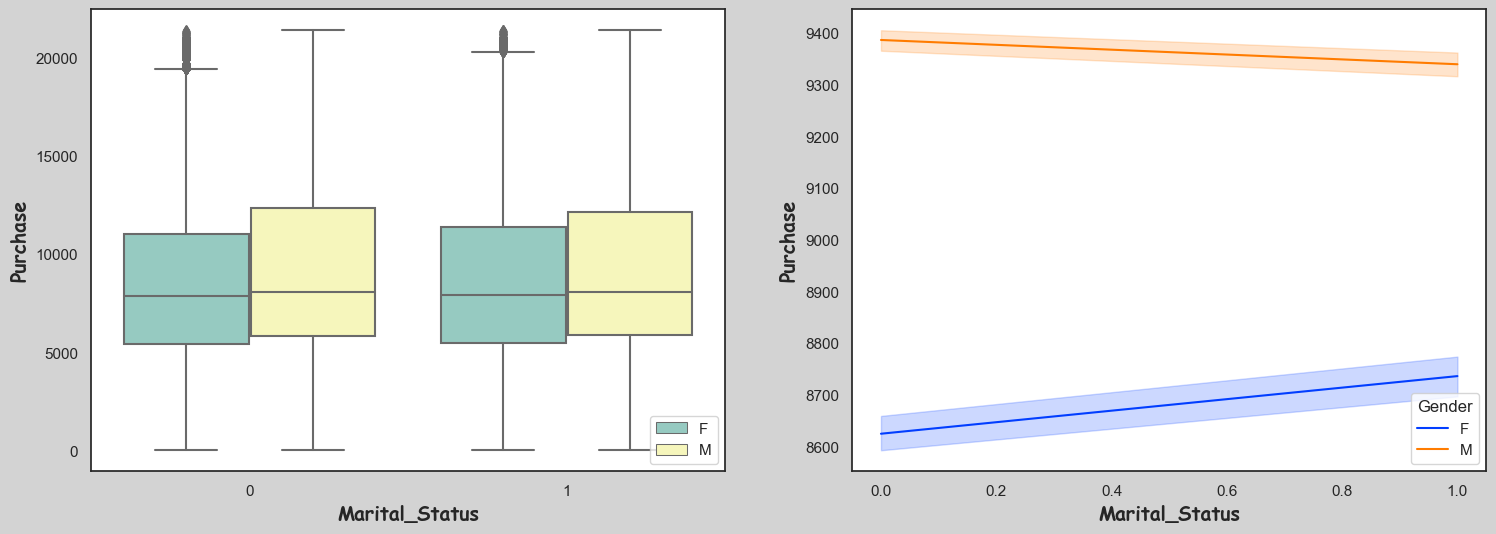

In [ ]:
col_num = [ 'Purchase']
num_cat_bi_grpby(df_v1,col_num,"Marital_Status",'Gender')

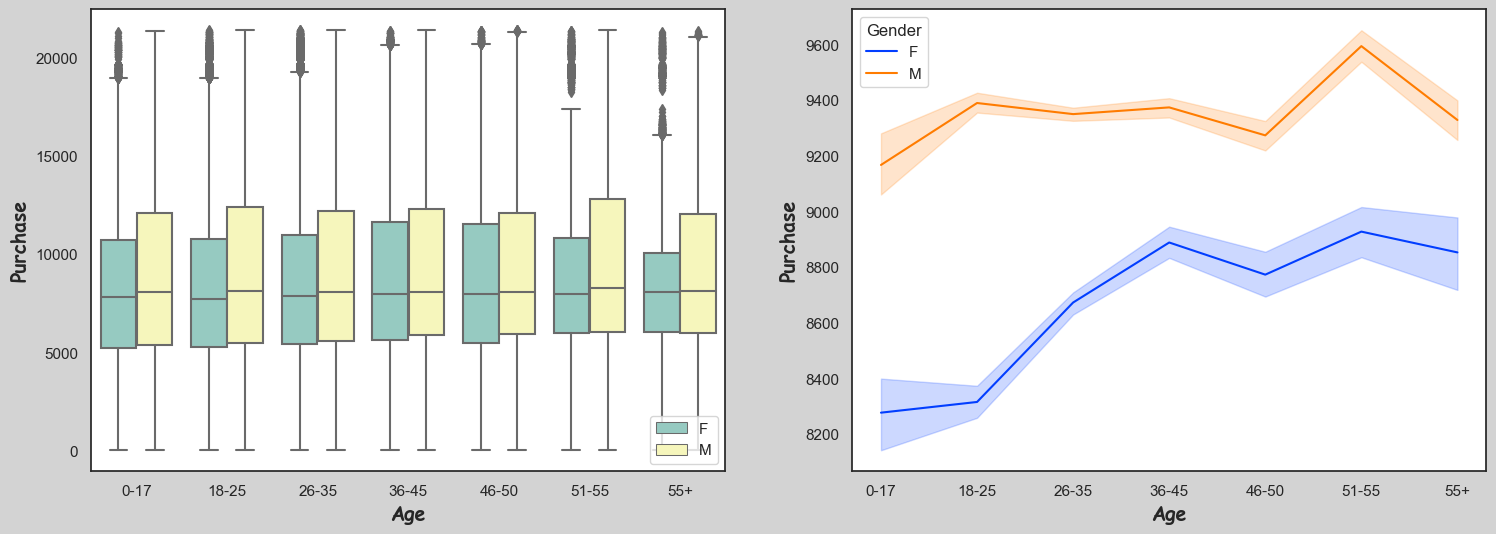

In [ ]:
col_num = [ 'Purchase']
num_cat_bi_grpby(df_v1,col_num,"Age",'Gender')

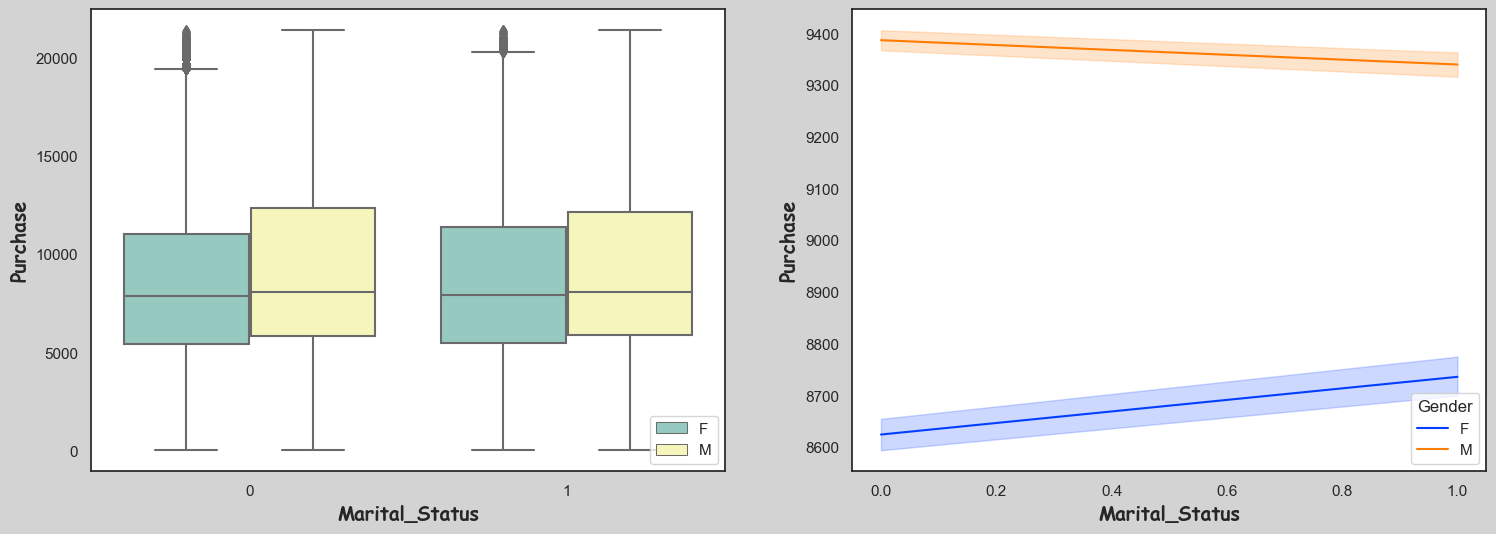

In [ ]:
col_num = [ 'Purchase']
num_cat_bi_grpby(df_v1,col_num,"Marital_Status",'Gender')

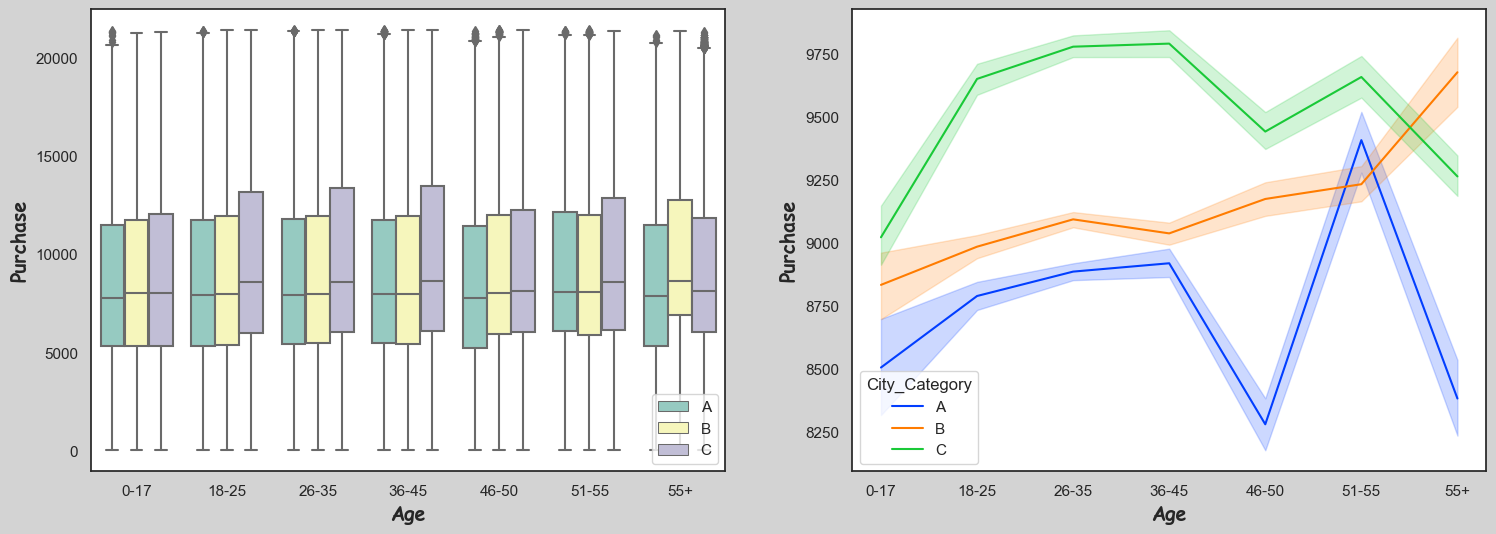

In [ ]:
col_num = [ 'Purchase']
num_cat_bi_grpby(df_v1,col_num,"Age",'City_Category')

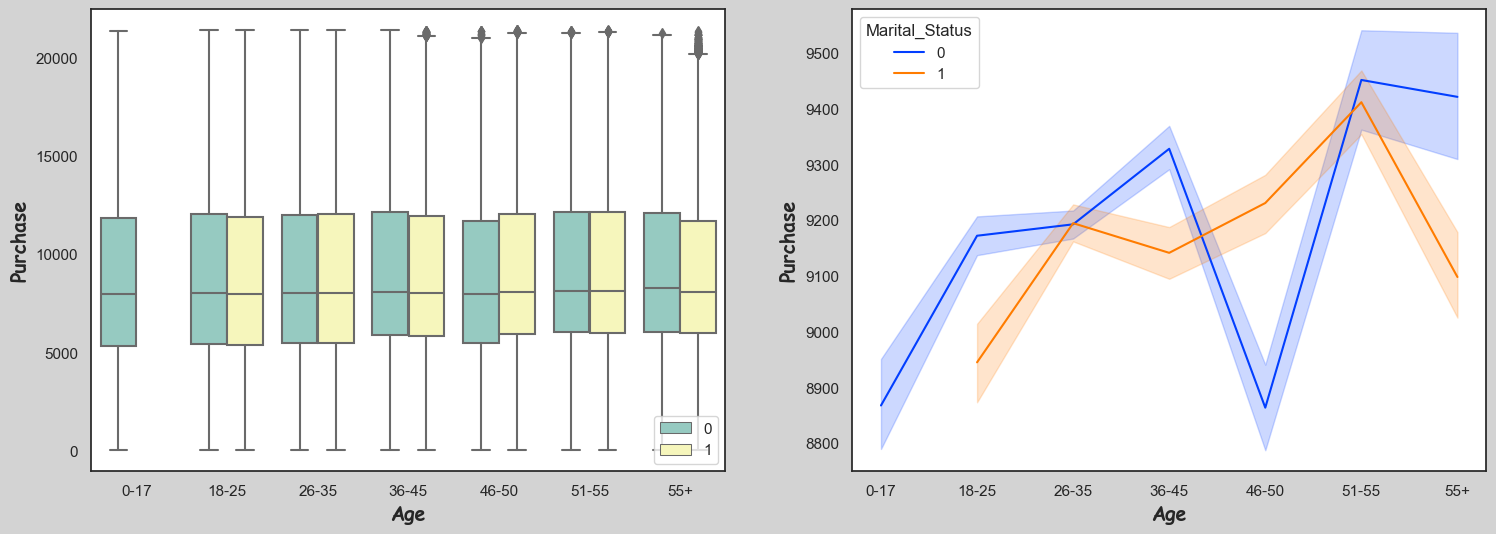

In [ ]:
col_num = [ 'Purchase']
num_cat_bi_grpby(df_v1,col_num,"Age",'Marital_Status')

# Inferences
    Purchases are high in city category C
    
    Purchase is the same for all age groups
    
    Most of the customers are 55+ and live in city category B
    
    City category C has more customers between the ages of 18 and 45.

In [ ]:
retail_data_v1 = df.copy()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


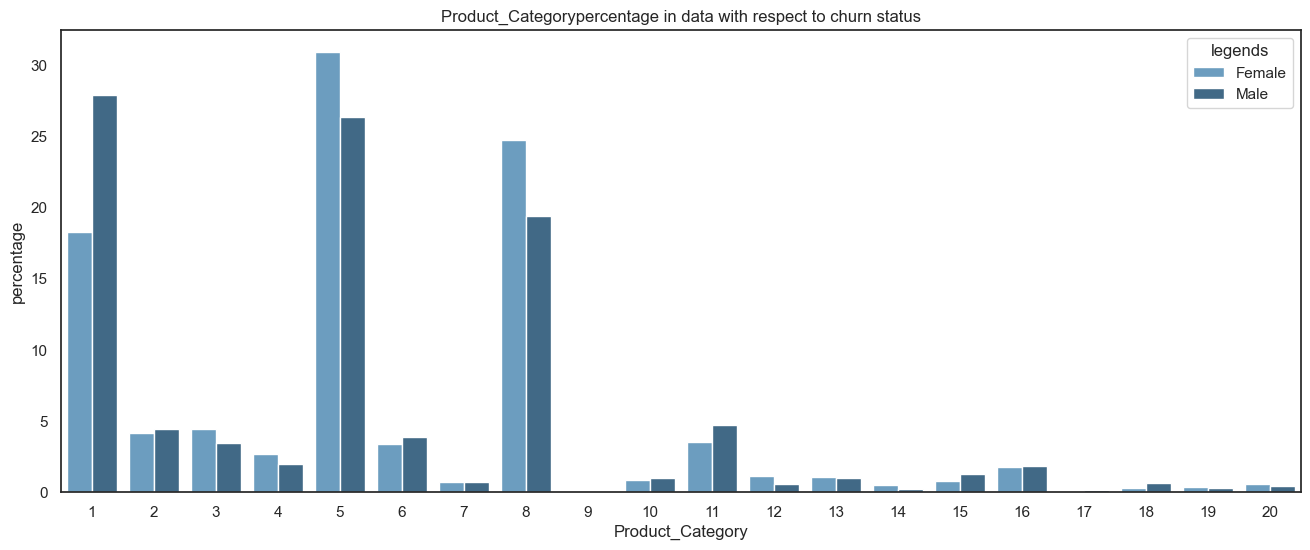

In [ ]:
def bar_M_vs_F(colname):
    fig = plt.figure(figsize=(16,6))

    male = retail_data_v1[retail_data_v1["Gender"]=='M'][colname].value_counts().reset_index()
    male["percentage"]  = (male[colname]*100/male[colname].sum())
    male["legends"]        = "Male"


    female = retail_data_v1[retail_data_v1["Gender"]=='F'][colname].value_counts().reset_index()
    female["percentage"] = (female[colname]*100/female[colname].sum())
    female["legends"]    = "Female"

    m_f_status = pd.concat([female,male],axis=0)

    ax = sns.barplot("index","percentage",data=m_f_status,hue="legends",palette="Blues_d")
    plt.xlabel(colname)
    fig.set_facecolor("white")
    plt.title(colname + "percentage in data with respect to churn status")
bar_M_vs_F('Product_Category')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


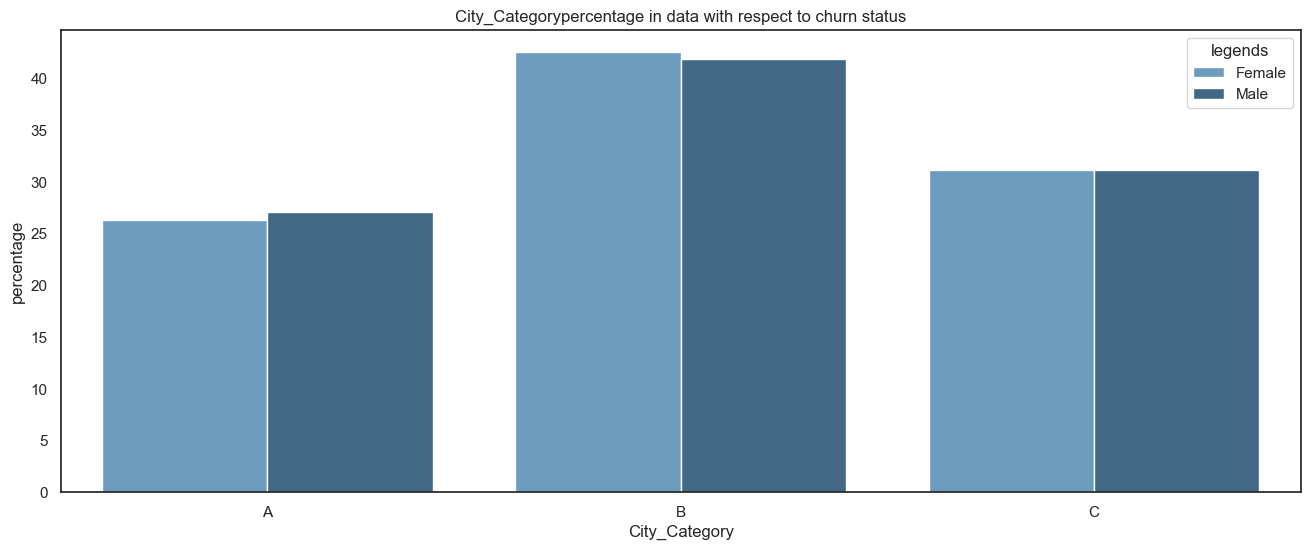

In [ ]:
bar_M_vs_F('City_Category')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


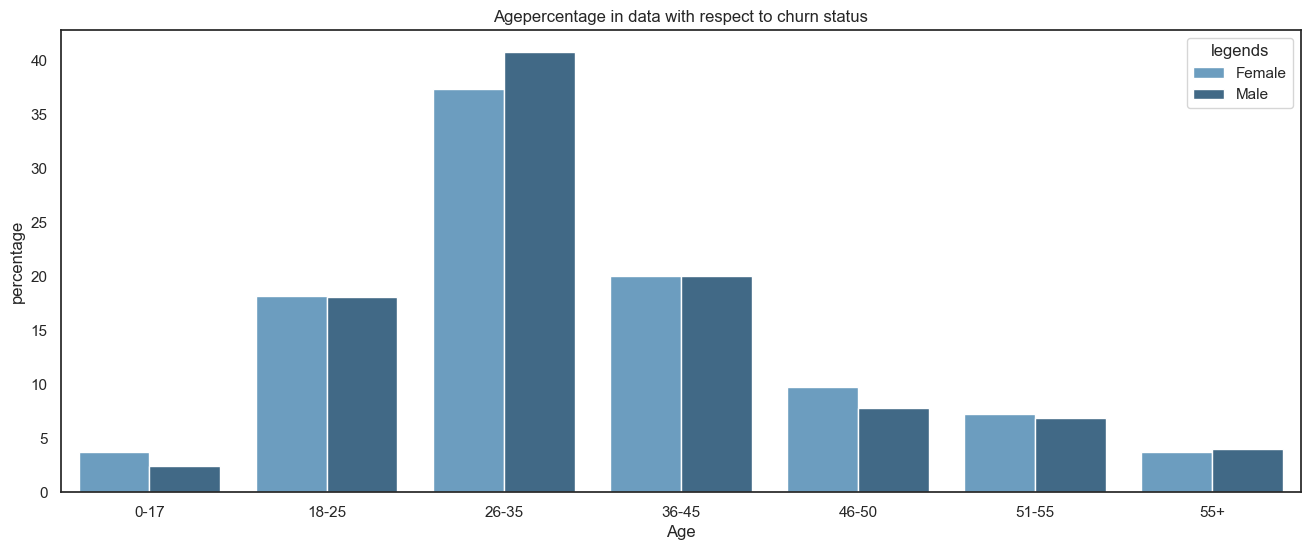

In [ ]:
bar_M_vs_F('Age')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


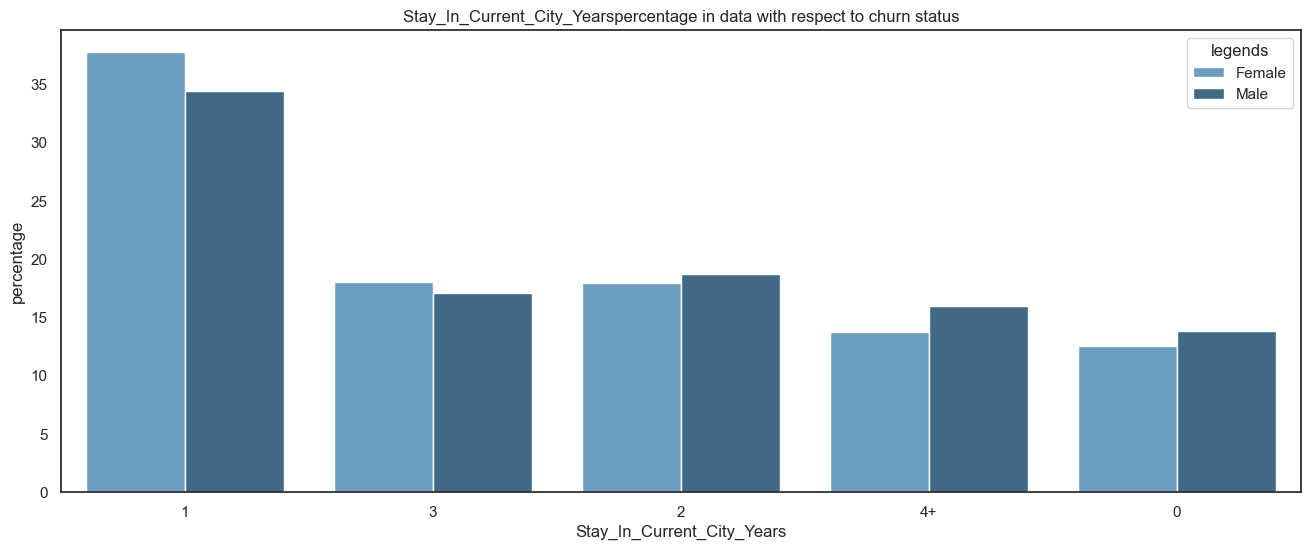

In [ ]:
bar_M_vs_F('Stay_In_Current_City_Years')

# Inferences
    Product 5 and 8 is common among females.
    
    In City Category C, there are slightly more female customers.

In [ ]:
print(retail_data_v1.groupby(['Gender','City_Category'])['User_ID'].count())

Gender  City_Category
F       A                 35704
        B                 57796
        C                 42309
M       A                112016
        B                173377
        C                128866
Name: User_ID, dtype: int64


<Figure size 2500x1000 with 0 Axes>

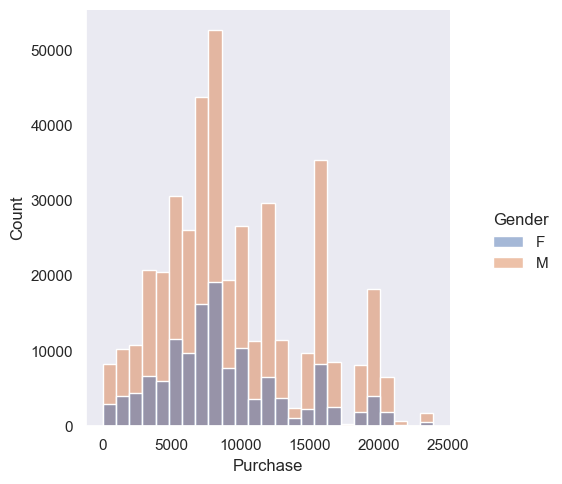

In [ ]:
fig = plt.figure(figsize=(25,10))
fig.set_facecolor("lightgrey")
sns.set(style='dark')
sns.displot(x= 'Purchase',data=retail_data_v1,hue='Gender',bins=25)
plt.show()

# Inference
    The amount of money spent by women is less than that spent by men

In [ ]:
retail_data_v1.sample(500,replace=True).groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,141.0,8520.617021,4558.142754,37.0,5454.0,7786.0,11447.0,20854.0
M,359.0,9391.389972,4683.552819,49.0,6003.5,8634.0,11964.0,20684.0


# Inference
    Even the sample mean shows that males spend more than females.

In [ ]:
retail_data_v1.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
retail_data_v1.shape

(550068, 10)

# Central limit Theorem

The central limit theorem states that the sampling distribution of a sample mean is approximately normal if the sample size is large enough, even if the population distribution is not normal.

Average amount spend per customer for Male and Female

In [ ]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000001,M,0
2,1000002,F,0
3,1000002,M,810472
4,1000003,F,0
...,...,...,...
11777,1006038,M,0
11778,1006039,F,590319
11779,1006039,M,0
11780,1006040,F,0


In [ ]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 663653.05
Average amount spend by Female customers: 201363.54


#### Observation
- Male customers spend more money than female customers

In [ ]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [ ]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

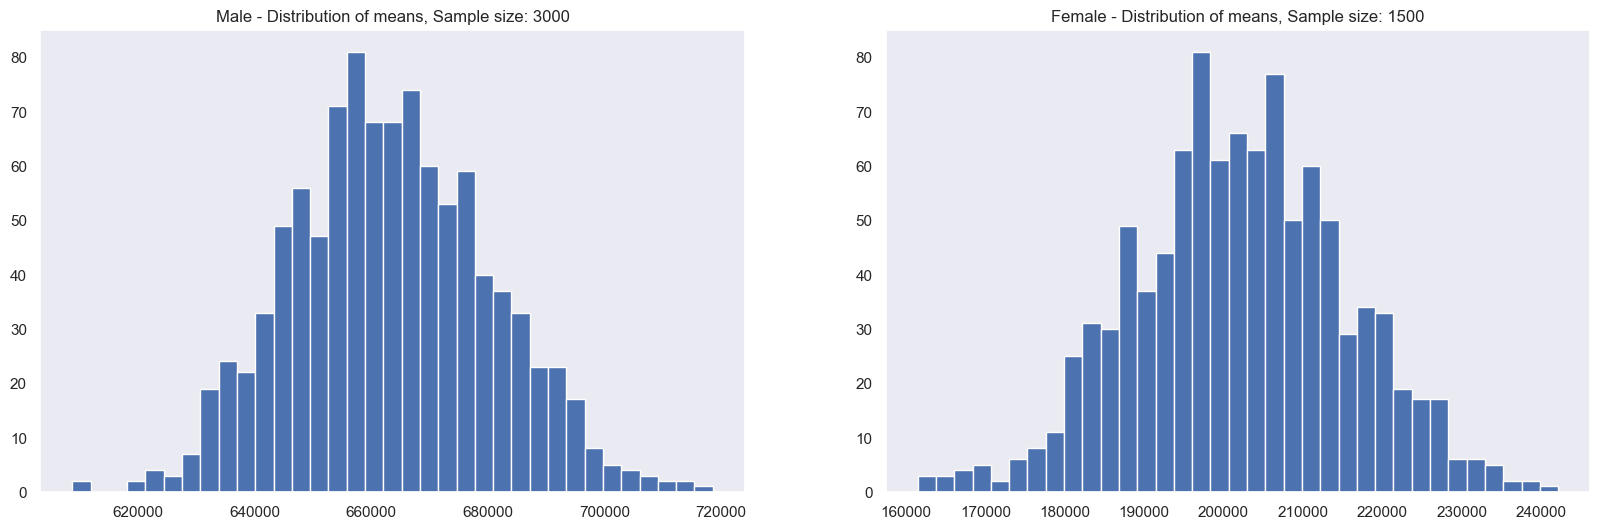

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 663277.93
Population mean - Mean of sample means of amount spend for Female: 202032.70

Male - Sample mean: 663653.05 Sample std: 933096.80
Female - Sample mean: 201363.54 Sample std: 535828.17


#### Observation

Now using the Central Limit Theorem for the population we can say that:

1. Average amount spend by male customers is 9,26,341.86
2. Average amount spend by female customers is 7,11,704.09

In [ ]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (639825.01, 687481.08)
Female confidence interval of means: (187680.36, 215046.73)


Now we can infer about the population that, 95% of the times:
- Average amount spend by male customer will lie in between: (895617.83, 955070.97)
- Average amount spend by female customer will lie in between: (673254.77, 750794.02)


####

#### Doing the same activity for married vs unmarried

In [ ]:
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000001,M,0
2,1000002,F,0
3,1000002,M,810472
4,1000003,F,0
...,...,...,...
11777,1006038,M,0
11778,1006039,F,590319
11779,1006039,M,0
11780,1006040,F,0


In [ ]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000001,1,0
2,1000002,0,810472
3,1000002,1,0
4,1000003,0,341635
...,...,...,...
11777,1006038,1,0
11778,1006039,0,0
11779,1006039,1,590319
11780,1006040,0,1653299


In [ ]:
amt_df['Marital_Status'].value_counts()

0    5891
1    5891
Name: Marital_Status, dtype: int64

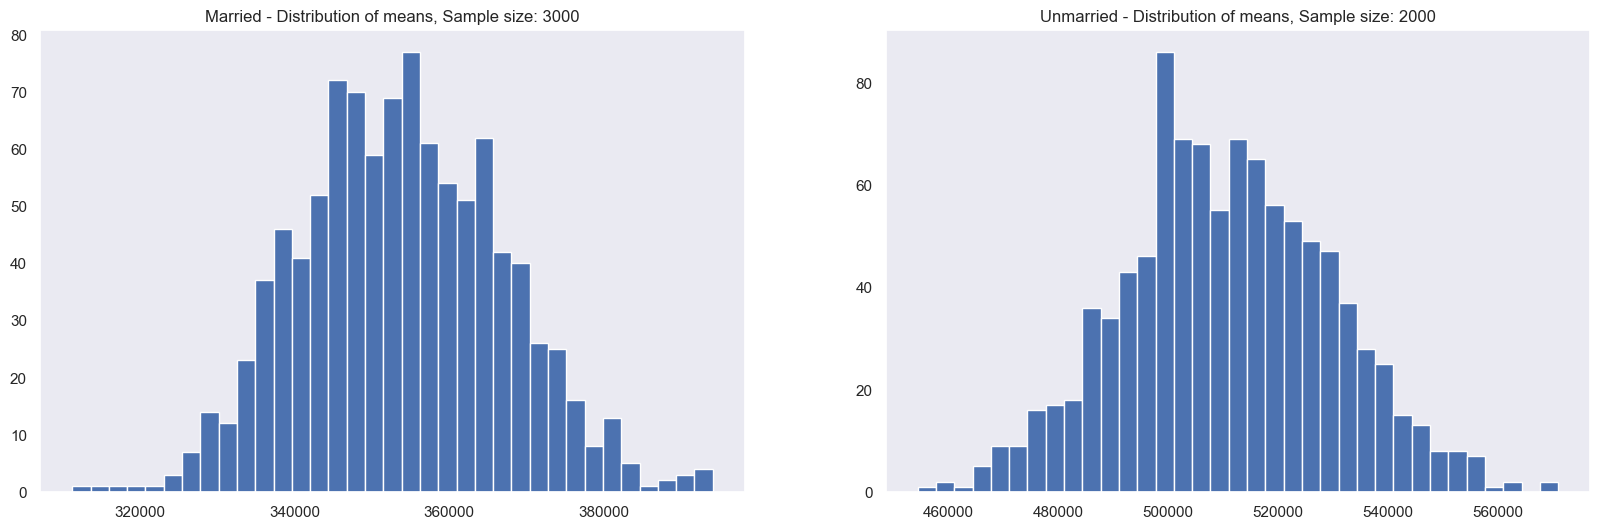

Population mean - Mean of sample means of amount spend for Married: 353798.65
Population mean - Mean of sample means of amount spend for Unmarried: 510618.36

Married - Sample mean: 354249.75 Sample std: 735314.88
Unmarried - Sample mean: 510766.84 Sample std: 843632.94


In [ ]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()
    
    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

In [ ]:
for val in ["Married", "Unmarried"]:
    
    new_val = 1 if val == "Married" else 0
    
    new_df = amt_df[amt_df['Marital_Status']==new_val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (335472.38, 373027.13)
Unmarried confidence interval of means: (489223.40, 532310.28)


#### Calculating the average amount spent by Age

In [ ]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000001,18-25,0
2,1000001,26-35,0
3,1000001,36-45,0
4,1000001,46-50,0
...,...,...,...
41232,1006040,26-35,1653299
41233,1006040,36-45,0
41234,1006040,46-50,0
41235,1006040,51-55,0


In [ ]:
amt_df['Age'].value_counts()

0-17     5891
18-25    5891
26-35    5891
36-45    5891
46-50    5891
51-55    5891
55+      5891
Name: Age, dtype: int64

In [ ]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = amt_df[amt_df['Age']==val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))


For age 26-35 --> confidence interval of means: (325226.35, 364561.66)
For age 36-45 --> confidence interval of means: (159958.40, 188563.04)
For age 18-25 --> confidence interval of means: (142318.86, 167933.62)
For age 46-50 --> confidence interval of means: (62258.26, 80618.47)
For age 51-55 --> confidence interval of means: (54450.95, 70179.72)
For age 55+ --> confidence interval of means: (28893.83, 39266.89)
For age 0-17 --> confidence interval of means: (18402.36, 27400.79)


#### Insights
- ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 75% of the users are Male and 25% are Female
- 60% Single, 40% Married
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- Total of 20 product categories are there
- There are 20 differnent types of occupations in the city


- Most of the users are Male
- There are 20 different types of Occupation and Product_Category
- More users belong to B City_Category
- More users are Single as compare to Married
- Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.


- Average amount spend by Male customers: 925344.40
- Average amount spend by Female customers: 712024.39

#### Confidence Interval by Gender¶
Now using the Central Limit Theorem for the population:

1. Average amount spend by male customers is 9,26,341.86
2. Average amount spend by female customers is 7,11,704.09

Now we can infer about the population that, 95% of the times:
1. Average amount spend by male customer will lie in between: (895617.83, 955070.97)
2. Average amount spend by female customer will lie in between: (673254.77, 750794.02)

Confidence Interval by Marital_Status
1. Married confidence interval of means: (806668.83, 880384.76)
2. Unmarried confidence interval of means: (848741.18, 912410.38)

#### Confidence Interval by Age
1. For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
2. For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
3. For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
4. For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
5. For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
6. For age 55+ --> confidence interval of means: (476948.26, 602446.23)
7. For age 0-17 --> confidence interval of means: (527662.46, 710073.17)

#### Recommendations
1. Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
2. **Product_Category - 1, 5, 8, & 11** have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
3. **Unmarried** customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
4. Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45
5. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.